In [30]:
%matplotlib inline

## Loading the IMDB dataset

In [31]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

### A look at the data

In [32]:
print('Review (index 0): ', train_data[0])
print('Label (index 0): ', train_labels[0])

Review (index 0):  [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Label (index 0):  1


In [33]:
max([max(sequence) for sequence in train_data])

9999

### A look at the data (decoded message from sample 0)

In [34]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## Enconding the integer sequences into a binary matrix

In [35]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [36]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print('x_train: ', x_train[0])
print('x_test: ', x_test[0])

x_train:  [0. 1. 1. ... 0. 0. 0.]
x_test:  [0. 1. 1. ... 0. 0. 0.]


In [37]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print('y_train: ', y_train[0])
print('y_test: ', y_test[0])

y_train:  1.0
y_test:  0.0


## The model definition

In [2]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


## Compiling the model

In [3]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

## Setting aside a validation set

In [78]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Training your model

In [79]:
fit_result = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 187us/step - loss: 0.4830 - acc: 0.7929 - val_loss: 0.3558 - val_acc: 0.8646
Epoch 2/20
15000/15000 [==============================] - 2s 161us/step - loss: 0.2714 - acc: 0.9051 - val_loss: 0.2975 - val_acc: 0.8814
Epoch 3/20
15000/15000 [==============================] - 2s 158us/step - loss: 0.1971 - acc: 0.9308 - val_loss: 0.3194 - val_acc: 0.8713
Epoch 4/20
15000/15000 [==============================] - 2s 158us/step - loss: 0.1551 - acc: 0.9478 - val_loss: 0.3180 - val_acc: 0.8747
Epoch 5/20
15000/15000 [==============================] - 2s 159us/step - loss: 0.1218 - acc: 0.9585 - val_loss: 0.3005 - val_acc: 0.8847
Epoch 6/20
15000/15000 [==============================] - 2s 160us/step - loss: 0.0949 - acc: 0.9696 - val_loss: 0.3216 - val_acc: 0.8823
Epoch 7/20
15000/15000 [==============================] - 2s 159us/step - loss: 0.0758 - acc: 0.9770 - val_loss: 0.3448 - 

In [80]:
fit_history = fit_result.history
print(history_dict.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


## Preparing the variables to plot

In [81]:
loss_values = fit_history['loss']
val_loss_values = fit_history['val_loss']
acc_values = fit_history['acc']
val_acc_values = fit_history['val_acc']

epochs = range(1, len(acc_values) + 1)

## Plotting the training and the validation accuracy

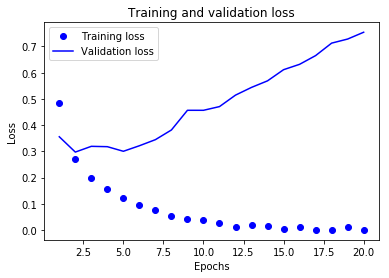

In [82]:
import matplotlib.pyplot as plt

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

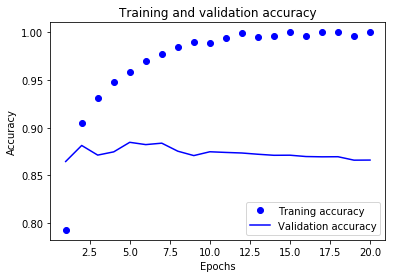

In [83]:
plt.clf
plt.plot(epochs, acc_values, 'bo', label='Traning accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [84]:
results = model.evaluate(x_test, y_test)
results

25000/25000 [==============================] - 4s 140us/step


[0.8286519979643822, 0.853]

In [52]:
fit_result = model.fit(x_train,
                   y_train,
                   epochs=4,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 25000 samples, validate on 10000 samples
Epoch 1/4
25000/25000 [==============================] - 3s 136us/step - loss: 0.2164 - acc: 0.9463 - val_loss: 0.2696 - val_acc: 0.9084
Epoch 2/4
25000/25000 [==============================] - 3s 136us/step - loss: 0.1399 - acc: 0.9582 - val_loss: 0.2044 - val_acc: 0.9296
Epoch 3/4
25000/25000 [==============================] - 3s 132us/step - loss: 0.1097 - acc: 0.9672 - val_loss: 0.1551 - val_acc: 0.9468
Epoch 4/4
25000/25000 [==============================] - 3s 132us/step - loss: 0.0867 - acc: 0.9728 - val_loss: 0.1227 - val_acc: 0.9589


In [53]:
fit_history = fit_result.history

loss_values = fit_history['loss']
val_loss_values = fit_history['val_loss']
acc_values = fit_history['acc']
val_acc_values = fit_history['val_acc']

epochs = range(1, len(acc_values) + 1)

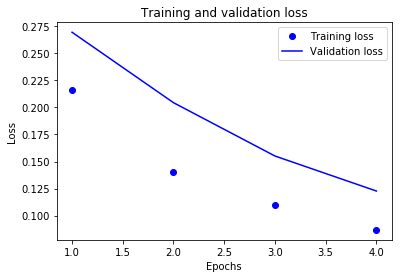

In [54]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

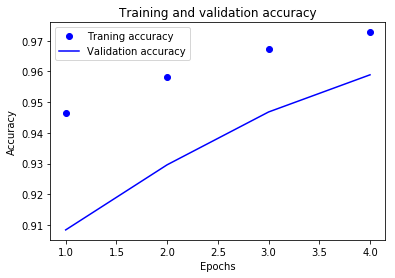

In [55]:
plt.clf
plt.plot(epochs, acc_values, 'bo', label='Traning accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [56]:
results = model.evaluate(x_test, y_test)
results

25000/25000 [==============================] - 4s 141us/step


[0.501146731812954, 0.8588]

## Using a trained network to generate predictions on new data

In [60]:
predictions = model.predict(x_test)
predictions

array([[0.01445866],
       [0.99999905],
       [0.99608624],
       ...,
       [0.20417473],
       [0.1115351 ],
       [0.7598244 ]], dtype=float32)